In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sn
from wordcloud import WordCloud, STOPWORDS


In [6]:
df=pd.read_csv("news.csv") # sample dataset from the website, later on we use the webscraped data
#print(df.info)
print(df.label)
X_train,X_test,Y_train,Y_test=train_test_split(df['text'], df.label, test_size=0.2, random_state=12)

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object


In [4]:
#create a tfidf vectorizer
tfidfvector=TfidfVectorizer(stop_words='english', max_df=0.8) #if frequency is greater than 0.8 toss out the terms
tfidf_train=tfidfvector.fit_transform(X_train) 
tfidf_test=tfidfvector.transform(X_test)
print(tfidf_train.shape)
#create a countvectorizer
countvector=CountVectorizer(stop_words='english', max_df=0.8)
countvector_train=countvector.fit_transform(X_train)
countvector_test=countvector.transform(X_test)

#create a passiveaggressive classifier
PassiveAgg=PassiveAggressiveClassifier()
PassiveAgg.fit(tfidf_train, Y_train)#for tfidfvectorier
PassiveAgg.fit(countvector_train, Y_train)#for countvectorizer
PassiveAgg_pred=PassiveAgg.predict(tfidf_test)
print("The accuracy using passiveaggressiveclassifier and tfidf vectorizer is:", accuracy_score(Y_test,PassiveAgg_pred))
PassiveAgg_pred=PassiveAgg.predict(countvector_test)
print("The accuracy using passiveaggressiveclassifier and countvector is",accuracy_score(Y_test,PassiveAgg_pred))

#use the naive bayes model to detect accuracy
# naivebayes= MultinomialNB()
# naivebayes.fit(tfidf_train,Y_train)
# naivepred=naivebayes.predict(tfidf_test)
# naivescore=accuracy_score(Y_test,naivepred)
# print("The accuracy using naive bayes model is and tfidfvector:", naivescore)

# naivebayes.fit(countvector_train,Y_train)
# naivepred=naivebayes.predict(countvector_test)
# naivescore=accuracy_score(Y_test,naivepred)
# print("The accuracy using naive bayes model and countvector is:", naivescore)


# create a Decisiontree
# DecisionTree=DecisionTreeClassifier()
# DecisionTree.fit(tfidf_train,Y_train)
# DecisionTreepred=DecisionTree.predict(tfidf_test)
# Decisionscore=accuracy_score(Y_test,DecisionTreepred)
# print("The accuracy using decision tree classifier and tfidfvector is",Decisionscore)

# DecisionTree.fit(countvector_train,Y_train)
# DecisionTreepred=DecisionTree.predict(countvector_test)
# DecisionTreescore=accuracy_score(Y_test,DecisionTreepred)
# print("The accuracy using decision tree classifier and countvector is:", DecisionTreescore)

#create a RandomForestClassifier

# RandomForest=RandomForestClassifier()
# RandomForest.fit(tfidf_train,Y_train)
# RandomForestpred=RandomForest.predict(tfidf_test)
# RandomForestscore=accuracy_score(Y_test,RandomForestpred)
# print("The accuracy using Random Forest classifier and tfidfvector is",RandomForestscore)

# DecisionTree.fit(countvector_train,Y_train)
# RandomForestpred=DecisionTree.predict(countvector_test)
# RandomForestscore=accuracy_score(Y_test,RandomForestpred)
# print("The accuracy using Random Forest Classifier and countvector is:", RandomForestscore)

(5068, 61790)
The accuracy using passiveaggressiveclassifier and tfidf vectorizer is: 0.904498816101026
The accuracy using passiveaggressiveclassifier and countvector is 0.8981846882399369


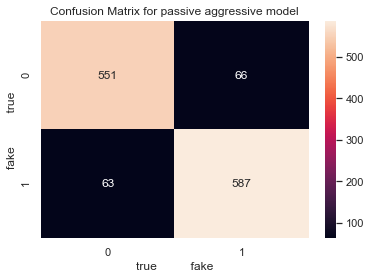

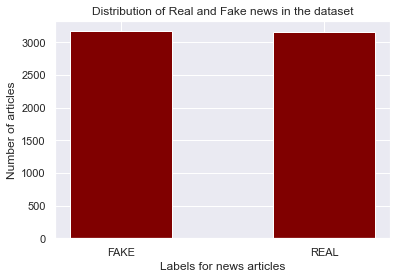

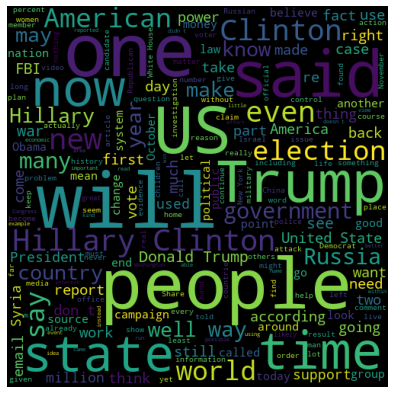

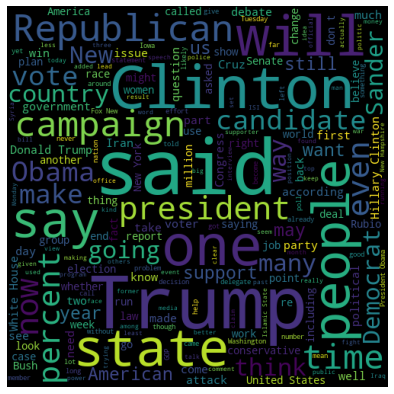

In [5]:
#graphical figures

#create a confusion matrix to look for false negatives, false positives, etc
#print("confusion matrix for passive aggresive model")
cm=confusion_matrix(Y_test,PassiveAgg_pred, labels=['FAKE','REAL']) 
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':12}, fmt='d').set_title('Confusion Matrix for passive aggressive model')
plt.ylabel('fake          true')
plt.xlabel('true          fake')
plt.show()

#bar chart of how many news articles in the dataset
labels=['FAKE','REAL']
labelscount=list(df['label'].value_counts())
plt.bar(labels,labelscount, color="maroon",width=0.5)
plt.xlabel("Labels for news articles")
plt.ylabel("Number of articles")
plt.title("Distribution of Real and Fake news in the dataset")
plt.show()

#wordcloud
STOPWORDS.update(["U","put","S"])
fake_news = df[df["label"] == "FAKE"]
all_words = ' '.join([text for text in fake_news.text])
wordcloud = WordCloud(width= 500, height= 500,
                          max_font_size = 100,stopwords=STOPWORDS).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

real_news = df[df["label"] == "REAL"]
all_words = ' '.join([text for text in real_news.text])
wordcloud = WordCloud(width= 500, height= 500,
                          max_font_size = 100,stopwords=STOPWORDS).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
